# Capstone Project (real title to come later)
### Ryan Khaleghi and Kevin Cannon

## Introduction


We

## Data

The dataset 

There are 8 ratings in the dataset: overall, value, rooms, location, cleanliness, check in/front desk, service, and business service. These are rated from 0-5 stars, with missing ratings indicated by -1.

In [99]:
import pandas as pd
import numpy as np
import glob
#import tripadvisor_convert
import dill

#save session
#dill.dump_session('notebook_env.db')

#load session
dill.load_session('notebook_env.db')

#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json_copy/73739.json'
#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/3256888.json'
#df = tripadvisor_convert.to_df(json_file)
#print(df.head(2))


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 10:39:29.474423. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [100]:
import json
from bs4 import BeautifulSoup
import pandas as pd
from os import path


def json_to_df(filename):
    """Return a Pandas DataFrame with Reviews from the JSON File given."""

    with open(filename) as f:
        data = json.load(f)
        reviews = data['Reviews']
        info = data['HotelInfo']

    df = pd.DataFrame()
    for review in reviews:
        rr = pd.Series(review['Ratings'], name=review['ReviewID'])
        rr['Date'] = review['Date']
        rr['Author'] = review['Author']
        rr['AuthorLocation'] = review['AuthorLocation'].split(', ')[-1]
        rr['Review'] = review['Content']
        df = df.append(rr)


    # Hotel Info
    df['HotelID'] = int(info['HotelID'])
    df['Hotel'] = info['Name']
    price_range = [int(''.join([el for el in price if el.isdigit()])) for price in info['Price'].split('-')]
    df['PriceMin'] = price_range[0]
    df['PriceMax'] = price_range[-1]
    address = BeautifulSoup(info['Address'], 'lxml')
    region = address.find('span', property='v:region').text
    df['HotelLocation'] = region

    return df

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 10:39:29.832783. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [151]:
from timeit import default_timer as timer #for timing

start = timer()
#load data
#path ='/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json_copy' # use your path
path ='/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json' # use your path
allFiles = glob.glob(path + "/*.json")
#print(allFiles)
randFiles = np.random.choice(allFiles, 500, replace=False)
df2 = pd.DataFrame()
df_reviews = pd.DataFrame()
list_ = []

for file_ in randFiles:
    try:
        #df = tripadvisor_convert.to_df(file_)
        df2 = json_to_df(file_)
    except Exception:
        pass 
    list_.append(df2)
    df_reviews = pd.concat(list_)
print(df_reviews.head(2))
end = timer()
print (end - start)
print(len(df_reviews))


                     Author        AuthorLocation  \
UR126268620  davidbViennaVA  District of Columbia   
UR126112970         N0_moss                   USA   

            Business service (e.g., internet access) Check in / front desk  \
UR126268620                                      NaN                   NaN   
UR126112970                                      NaN                   NaN   

            Cleanliness            Date                Hotel  HotelID  \
UR126268620           4  March 18, 2012  Mayfair Hotel & Spa   217395   
UR126112970           5  March 14, 2012  Mayfair Hotel & Spa   217395   

            HotelLocation Location Overall  PriceMax  PriceMin  \
UR126268620            FL        4     4.0       398       146   
UR126112970            FL        5     5.0       398       146   

                                                        Review Rooms Service  \
UR126268620  Stayed for 3 nights for conference in early Ma...     3       4   
UR126112970  I had a pheno

/Users/Ryan/anaconda/lib/python3.5/site-packages/bs4/builder/_lxml.py:240: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  self.parser.feed(markup)
/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:13:01.086707. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### EDA
Here we will explore the data.

In [152]:
df_reviews.dtypes

Author                                      object
AuthorLocation                              object
Business service (e.g., internet access)    object
Check in / front desk                       object
Cleanliness                                 object
Date                                        object
Hotel                                       object
HotelID                                      int64
HotelLocation                               object
Location                                    object
Overall                                     object
PriceMax                                     int64
PriceMin                                     int64
Review                                      object
Rooms                                       object
Service                                     object
Sleep Quality                               object
Value                                       object
dtype: object

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:27:57.663736. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [153]:
#deal with missing numbers
df_reviews.fillna(0, inplace = True)
#df_reviews.isnull()

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:02.927887. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [154]:
#convert ratings into numbers instead of objects
df_reviews = df_reviews.astype({'Cleanliness': 'int64', 'Location': 'int64', 'Rooms': 'int64', 'Service': 'int64', \
                   'Sleep Quality': 'int64', 'Value': 'int64', 'Business service (e.g., internet access)': 'int64', \
                  'Check in / front desk': 'int64', 'Overall': 'float'})
df_reviews.dtypes

Author                                       object
AuthorLocation                               object
Business service (e.g., internet access)      int64
Check in / front desk                         int64
Cleanliness                                   int64
Date                                         object
Hotel                                        object
HotelID                                       int64
HotelLocation                                object
Location                                      int64
Overall                                     float64
PriceMax                                      int64
PriceMin                                      int64
Review                                       object
Rooms                                         int64
Service                                       int64
Sleep Quality                                 int64
Value                                         int64
dtype: object

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:05.314939. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [158]:
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])

,BusServ,CheckIn,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,147463.000000,147463.000000,147463.000000,1.474630e+05,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000
mean,0.349694,0.682605,3.624102,1.073851e+06,3.351953,3.822043,326.258451,162.704407,3.109302,3.452683,1.947417,3.432793
std,1.118758,1.555174,1.684414,1.142945e+06,2.064403,1.229765,150.440055,84.101965,1.842525,1.707114,2.174122,1.678795
min,0.000000,0.000000,0.000000,7.371200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,7.727000e+04,0.000000,1.000000,59.000000,39.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,8.759000e+04,0.000000,1.000000,123.000000,78.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,1.119700e+05,1.000000,3.000000,234.000000,109.000000,2.000000,3.000000,0.000000,3.000000
50%,0.000000,0.000000,4.000000,2.084540e+05,4.000000,4.000000,278.000000,131.000000,4.000000,4.000000,0.000000,4.000000
75%,0.000000,0.000000,5.000000,2.514645e+06,5.000000,5.000000,446.000000,231.000000,5.000000,5.000000,4.000000,5.000000
95%,4.000000,5.000000,5.000000,2.515942e+06,5.000000,5.000000,602.000000,286.000000,5.000000,5.000000,5.000000,5.000000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:35.191579. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [159]:
# Remove date attribute that isn't going to be used in the analysis
df_reviews = df_reviews.drop(['Date'], axis = 1)
print(df_reviews.head(2))

ValueError: labels ['Date'] not contained in axis

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:39.701571. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [157]:
df_reviews.rename(index=str, columns={"Business service (e.g., internet access)": "BusServ", \
                                     "Check in / front desk": "CheckIn"}, inplace= True)
print(df_reviews.head(2))

                     Author        AuthorLocation  BusServ  CheckIn  \
UR126268620  davidbViennaVA  District of Columbia        0        0   
UR126112970         N0_moss                   USA        0        0   

             Cleanliness                Hotel  HotelID HotelLocation  \
UR126268620            4  Mayfair Hotel & Spa   217395            FL   
UR126112970            5  Mayfair Hotel & Spa   217395            FL   

             Location  Overall  PriceMax  PriceMin  \
UR126268620         4      4.0       398       146   
UR126112970         5      5.0       398       146   

                                                        Review  Rooms  \
UR126268620  Stayed for 3 nights for conference in early Ma...      3   
UR126112970  I had a phenomenal stay at the Mayfair. The ho...      5   

             Service  Sleep Quality  Value  
UR126268620        4              0      4  
UR126112970        5              5      5  


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:20.768684. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [160]:
#what to do with missing values, now set to zero?
#set missing values to overall rating doesn't seem crazy, since it's the average of other ratings
#need to change from int64 to float64 because overall is a float
df_reviews = df_reviews.astype({'Cleanliness': 'float', 'Location': 'float', 'Rooms': 'float', 'Service': 'float', \
                   'Sleep Quality': 'float', 'Value': 'float', 'BusServ': 'float', 'CheckIn': 'float'})
df_reviews.dtypes


Author             object
AuthorLocation     object
BusServ           float64
CheckIn           float64
Cleanliness       float64
Hotel              object
HotelID             int64
HotelLocation      object
Location          float64
Overall           float64
PriceMax            int64
PriceMin            int64
Review             object
Rooms             float64
Service           float64
Sleep Quality     float64
Value             float64
dtype: object

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:44.965665. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [161]:
#now we can assign values
df_reviews['BusServ'] = np.where(df_reviews['BusServ'] == 0, df_reviews['Overall'], df_reviews['BusServ'])
df_reviews['CheckIn'] = np.where(df_reviews['CheckIn'] == 0, df_reviews['Overall'], df_reviews['CheckIn'])
df_reviews['Cleanliness'] = np.where(df_reviews['Cleanliness'] == 0, df_reviews['Overall'], df_reviews['Cleanliness'])
df_reviews['Location'] = np.where(df_reviews['Location'] == 0, df_reviews['Overall'], df_reviews['Location'])
df_reviews['Rooms'] = np.where(df_reviews['Rooms'] == 0, df_reviews['Overall'], df_reviews['Rooms'])
df_reviews['Service'] = np.where(df_reviews['Service'] == 0, df_reviews['Overall'], df_reviews['Service'])
df_reviews['Sleep Quality'] = np.where(df_reviews['Sleep Quality'] == 0, df_reviews['Overall'], df_reviews['Sleep Quality'])
df_reviews['Value'] = np.where(df_reviews['Value'] == 0, df_reviews['Overall'], df_reviews['Value'])
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])


,BusServ,CheckIn,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,147463.000000,147463.000000,147463.000000,1.474630e+05,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000,147463.000000
mean,3.797902,3.841581,4.017137,1.073851e+06,4.256878,3.822043,326.258451,162.704407,3.795169,3.846633,3.859287,3.819867
std,1.230777,1.227558,1.198537,1.142945e+06,1.058038,1.229765,150.440055,84.101965,1.232365,1.278483,1.248091,1.259692
min,1.000000,1.000000,1.000000,7.371200e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,1.000000,1.000000,1.000000,7.727000e+04,1.000000,1.000000,59.000000,39.000000,1.000000,1.000000,1.000000,1.000000
5%,1.000000,1.000000,1.000000,8.759000e+04,2.000000,1.000000,123.000000,78.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,1.119700e+05,4.000000,3.000000,234.000000,109.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,2.084540e+05,5.000000,4.000000,278.000000,131.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,2.514645e+06,5.000000,5.000000,446.000000,231.000000,5.000000,5.000000,5.000000,5.000000
95%,5.000000,5.000000,5.000000,2.515942e+06,5.000000,5.000000,602.000000,286.000000,5.000000,5.000000,5.000000,5.000000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:49.148911. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


<IPython.core.display.Javascript object>


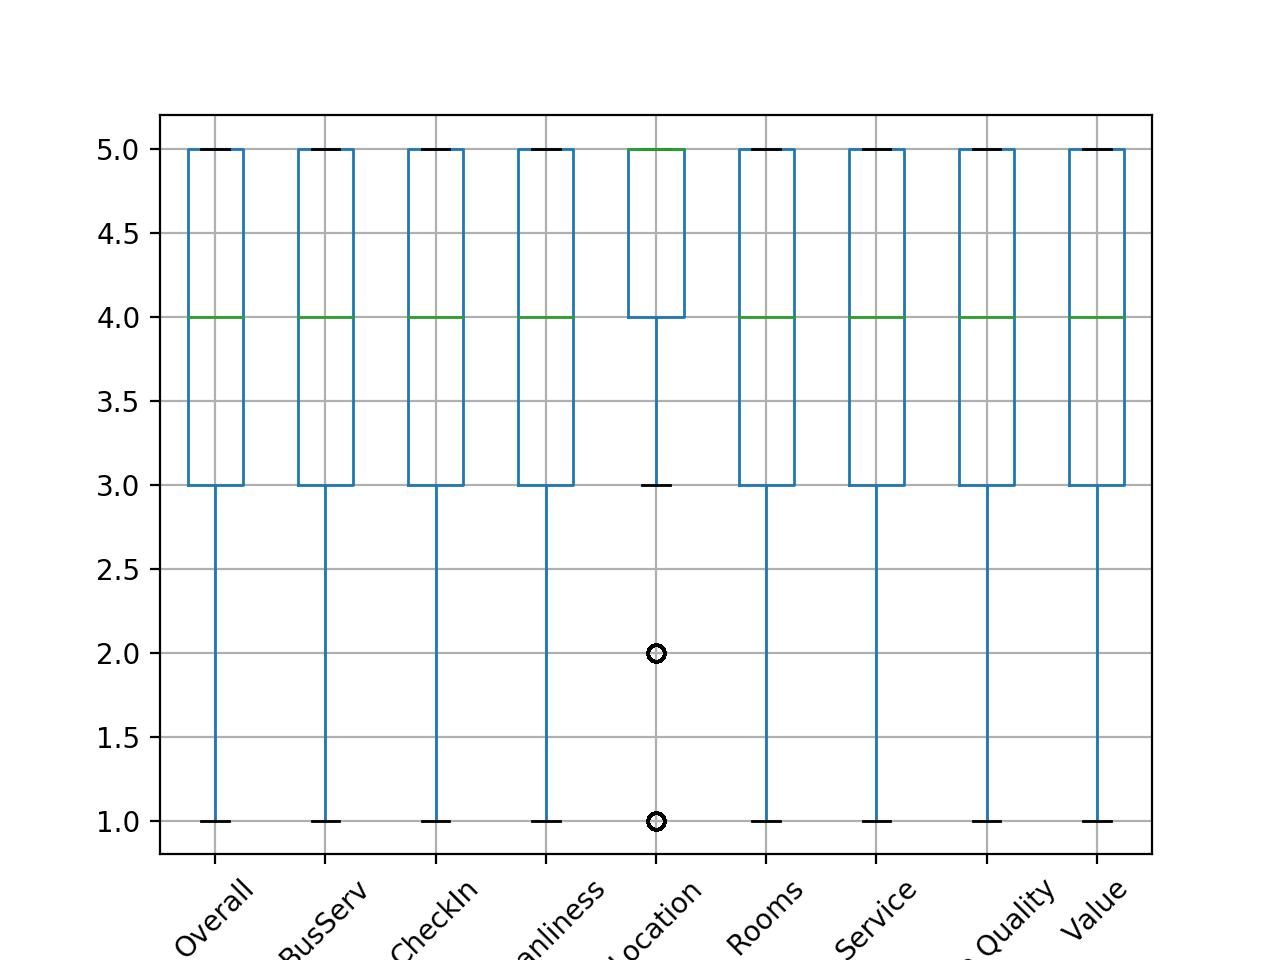

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:53.564091. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [162]:
%matplotlib notebook
import matplotlib.pyplot as plt
df_reviews.boxplot(column=['Overall', 'BusServ', 'CheckIn', 'Cleanliness', 'Location', 'Rooms', 'Service', \
                           'Sleep Quality', 'Value'])
plt.xticks(rotation=45)
plt.show()



<IPython.core.display.Javascript object>


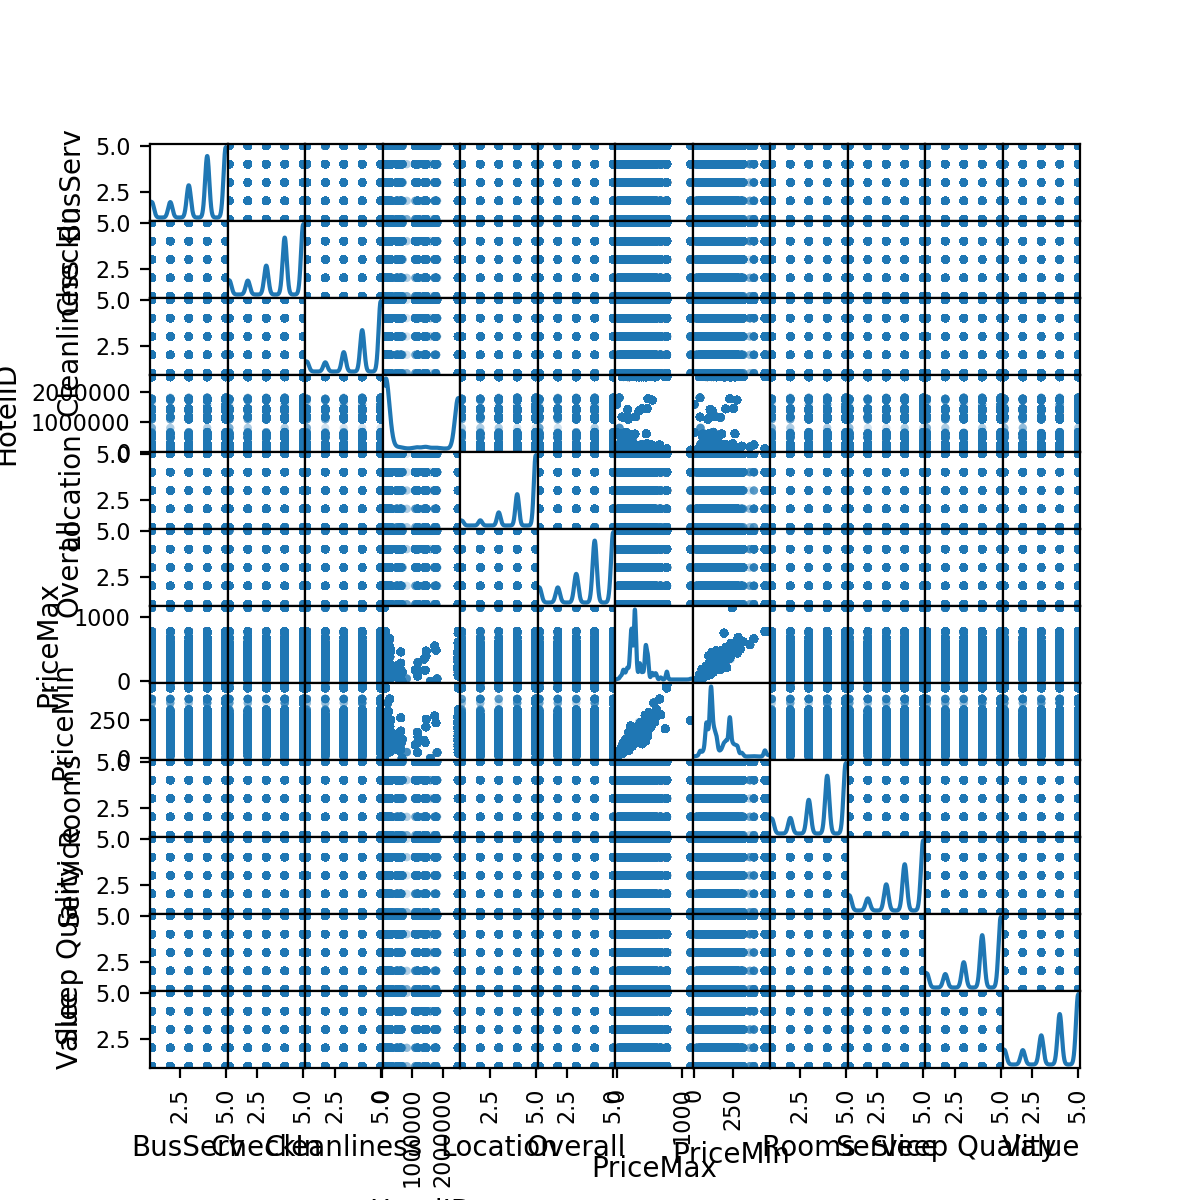

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14140b668>,
      dtype=object)

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:28:58.929027. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [163]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_reviews, alpha=0.2, figsize=(6,6), diagonal='kde')

As we see above, 

## Written Reviews

As we have the numerical factors taken care of, the last step before the modeling is to turn the written user reviews into vectors that an algorithm can understand. We do this by assigning a numerical score from 1-5 to the review text.

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime

#uses groups of 1 or 2 words
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.datetime.now()
vectors = vectorizer.fit_transform(df_reviews['Review'])
print(datetime.datetime.now()-t1)

0:01:51.379603


/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:32:57.213204. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, df_reviews['Overall'], test_size=.3, random_state=42)


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:34:56.087535. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [166]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()

t1 = datetime.datetime.now()
classifier.fit(X_train, y_train)
print(datetime.datetime.now()-t1)


0:00:34.073362


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:35:01.213057. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [167]:
preds = classifier.predict(X_test)
print (list(preds[:10]))
print(y_test[:10])

[1.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0]
UR47265277     1.0
UR80271913     4.0
UR125655104    4.0
UR123298282    4.0
UR127095571    4.0
UR57026667     5.0
UR52244048     4.0
UR13791531     5.0
UR2919535      4.0
UR8280299      5.0
Name: Overall, dtype: float64


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:36:30.727960. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [168]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, preds))

0.942064694048238


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:36:36.238986. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Since the accuracy is high, we will perform the transformation to score the reviews and add the column to the dataset.

In [169]:
df_reviews.index.values

array(['UR126268620', 'UR126112970', 'UR125859076', ..., 'UR1274417',
       'UR1258730', 'UR496794'], dtype=object)

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:36:39.791487. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [170]:
df_scores = pd.DataFrame(classifier.predict(vectors), index=df_reviews.index.values, columns=['ReviewScores'])
print(df_scores[:10])
df_scores.describe()
df_scores.dtypes
print(len(df_scores))


             ReviewScores
UR126268620           4.0
UR126112970           5.0
UR125859076           4.0
UR125768929           4.0
UR125299171           1.0
UR125187474           5.0
UR125146126           4.0
UR125134441           2.0
UR124992331           4.0
UR124991978           5.0
147463


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:37:04.063513. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [176]:
#df_reviews.duplicated()
#df_scores.duplicated()

#df_reviews[df_reviews.duplicated(keep=False)]

,Author,AuthorLocation,BusServ,CheckIn,Cleanliness,Hotel,HotelID,HotelLocation,Location,Overall,PriceMax,PriceMin,Review,Rooms,Service,Sleep Quality,Value
UR129069779,Peterson41,Indianapolis,5.0,5.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,5.0,5.0,196,107,I have stayed at this hotel a number of times....,5.0,5.0,5.0,5.0
UR129006183,MOMSPH,,4.0,4.0,4.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,5.0,4.0,196,107,"Love the location, 5 mins from Sea World and a...",3.0,5.0,3.0,4.0
UR128493326,ken p,Colorado,4.0,4.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,3.0,4.0,196,107,"The staff are fantasic especially ""Maegen Iban...",4.0,5.0,4.0,4.0
UR128482573,venice176,venice,3.0,3.0,3.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,1.0,3.0,196,107,Breakfast is good. Location is not so good. Pa...,3.0,3.0,4.0,4.0
UR128429488,Terry L,Arizona,4.0,4.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,4.0,4.0,196,107,"Was very nice, clean, convenient. Very spread ...",5.0,5.0,5.0,4.0
UR128363980,Gabriel S,Tustin,5.0,5.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,5.0,5.0,196,107,Acommodatons were great and so were the guest ...,5.0,5.0,5.0,5.0
UR127865307,Dennis S,United States,5.0,5.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,3.0,5.0,196,107,This is a great hotel--definately at the upper...,4.0,5.0,5.0,5.0
UR127825290,LoriBT,Elk Grove,4.0,4.0,4.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,5.0,4.0,196,107,My group was in San Diego for a high school ba...,4.0,5.0,4.0,4.0
UR127773535,OceanBreezesSD,Indio CA,4.0,4.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,4.0,4.0,196,107,"Everything about our stay was flawless. Clean,...",5.0,5.0,5.0,5.0
UR127639141,Johnny M,San Diego,5.0,5.0,5.0,Hampton Inn San Diego Airport / SeaWorld,2515612,CA,4.0,5.0,196,107,It has been such a pleasant experience staying...,5.0,5.0,5.0,5.0


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:42:43.814926. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [177]:
#merge dataframes on index
df_reviews2 = df_reviews.join(df_scores, how='inner')
df_reviews2.drop_duplicates(keep='first', inplace=True)
print(df_reviews2[:10])
df_reviews2.describe()
print(len(df_reviews2))

                       Author  AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR10000109            Rover87     Long Island      5.0      5.0          5.0   
UR10000237      flowerfloosey              ca      3.0      4.0          2.0   
UR10000251            max-sun          Canada      5.0      5.0          5.0   
UR100005389      johnneiliona          Canada      1.0      1.0          1.0   
UR100008112          frieda-f              PA      4.0      4.0          5.0   
UR100010632  ontheroadtoomuch      Pittsburgh      4.0      4.0          3.0   
UR10001208   MikeLondonLondon          London      5.0      5.0          5.0   
UR100014286             Savur         Ukraine      4.0      4.0          4.0   
UR10001641             luki13    Pennsylvania      5.0      5.0          5.0   
UR10001646       ElaineCSmith  United Kingdom      3.0      2.0          4.0   

                                                Hotel  HotelID HotelLocation  \
UR10000109      The Ritz Carlton Coconu

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:46:18.071910. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Collaborative Filtering

Now that we have the data in and examined, we begin the collaborative filtering recommender system.

In [178]:
#graphlab is deprecated so we are using turi create from Apple
#make Sframe out of pandas dataframe
import turicreate as tc
from turicreate import SFrame
sf_reviews = SFrame(data=df_reviews2)
sf_reviews.show()


Materializing SFrame

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:46:55.886335. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [179]:
sf_reviews['ReviewScores']

dtype: float
Rows: 47218
[5.0, 4.0, 5.0, 1.0, 4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 5.0, 2.0, 5.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 1.0, 4.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 3.0, 5.0, 1.0, 4.0, 5.0, 5.0, 5.0, 2.0, 1.0, 2.0, 5.0, 4.0, 5.0, 1.0, 5.0, 1.0, 4.0, 2.0, 5.0, 5.0, 5.0, 4.0, 4.0, 2.0, 5.0, 5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 3.0, 4.0, 3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 1.0, 3.0, 4.0, 5.0, ... ]

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:47:11.097841. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [180]:
#train test split
#this is for now, we will likely use specific usernames later to test
training_data, validation_data = tc.recommender.util.random_split_by_user(sf_reviews, user_id='Author', item_id='Hotel')


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:47:19.784965. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
#model = tc.load_model("collab.model")

In [181]:
#collaborative filtering model
model = tc.item_similarity_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
model.save("collab.model")


Recsys training: model = item_similarity

Warning: Ignoring columns AuthorLocation, BusServ, CheckIn, Cleanliness, HotelID, HotelLocation, Location, PriceMax, PriceMin, Review, Rooms, Service, Sleep Quality, Value, ReviewScores;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 47009 observations with 41758 users and 178 items.

Data prepared in: 0.144009s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.115ms                        | 2.25       |

| 13.834ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 19.19ms                             | 0                | 0               |

| 33.66ms                             | 100              | 178             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.04803s

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:47:25.079866. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [182]:
recs = model.recommend()

recommendations finished on 1000/41758 queries. users per second: 161891

recommendations finished on 2000/41758 queries. users per second: 151757

recommendations finished on 3000/41758 queries. users per second: 178923

recommendations finished on 4000/41758 queries. users per second: 154297

recommendations finished on 5000/41758 queries. users per second: 151837

recommendations finished on 6000/41758 queries. users per second: 142494

recommendations finished on 7000/41758 queries. users per second: 153657

recommendations finished on 8000/41758 queries. users per second: 149886

recommendations finished on 9000/41758 queries. users per second: 155529

recommendations finished on 10000/41758 queries. users per second: 145389

recommendations finished on 11000/41758 queries. users per second: 152367

recommendations finished on 12000/41758 queries. users per second: 158128

recommendations finished on 13000/41758 queries. users per second: 162141

recommendations finished on 14000/41758 queries. users per second: 151396

recommendations finished on 15000/41758 queries. users per second: 150557

recommendations finished on 16000/41758 queries. users per second: 133056

recommendations finished on 17000/41758 queries. users per second: 130854

recommendations finished on 18000/41758 queries. users per second: 123147

recommendations finished on 19000/41758 queries. users per second: 122916

recommendations finished on 20000/41758 queries. users per second: 122505

recommendations finished on 21000/41758 queries. users per second: 124440

recommendations finished on 22000/41758 queries. users per second: 126140

recommendations finished on 23000/41758 queries. users per second: 127712

recommendations finished on 24000/41758 queries. users per second: 127986

recommendations finished on 25000/41758 queries. users per second: 130191

recommendations finished on 26000/41758 queries. users per second: 132683

recommendations finished on 27000/41758 queries. users per second: 133202

recommendations finished on 28000/41758 queries. users per second: 133780

recommendations finished on 29000/41758 queries. users per second: 135531

recommendations finished on 30000/41758 queries. users per second: 136223

recommendations finished on 31000/41758 queries. users per second: 136795

recommendations finished on 32000/41758 queries. users per second: 137222

recommendations finished on 33000/41758 queries. users per second: 136452

recommendations finished on 34000/41758 queries. users per second: 138506

recommendations finished on 35000/41758 queries. users per second: 134965

recommendations finished on 36000/41758 queries. users per second: 136836

recommendations finished on 37000/41758 queries. users per second: 136946

recommendations finished on 38000/41758 queries. users per second: 137169

recommendations finished on 39000/41758 queries. users per second: 138886

recommendations finished on 40000/41758 queries. users per second: 140725

recommendations finished on 41000/41758 queries. users per second: 140902

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:47:31.901018. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
#model2 = tc.load_model("factor.model")

In [183]:
#factorization model
model2 = tc.ranking_factorization_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
model2.save("factor.model")


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 47009 observations with 41758 users and 178 items.

Data prepared in: 0.594681s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 47009 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.94118           | Not Viable                               |

| 1       | 0.735294          | Not Viable                               |

| 2       | 0.183824          | Not Viable                               |

| 3       | 0.0459559         | Not Viable                               |

| 4       | 0.011489          | Not Viable                               |

| 5       | 0.00287224        | Not Viable                               |

| 6       | 0.000718061       | Not Viable                               |

| 7       | 0.000179515       | No Decrease (26.6136 >= 2.96614)         |

| 8       | 4.48788e-05       | No Decrease (3.56238 >= 2.96614)         |

| 9       | 1.12197e-05       | 2.95776                                  |

| 10      | 5.60985e-06       | 2.95044                                  |

| 11      | 2.80492e-06       | 2.9555                                   |

| 12      | 1.40246e-06       | 2.96024                                  |

| 13      | 7.01231e-07       | 2.96296                                  |

+---------+-------------------+------------------------------------------+

| Final   | 5.60985e-06       | 2.95044                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 159us        | 2.9511            | 1.22646               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 791.697ms    | 2.87252           | 1.2213                | 5.60985e-06 |

| 2       | 1.39s        | 2.86845           | 1.21833               | 5.60985e-06 |

| 3       | 2.16s        | 2.86899           | 1.21713               | 5.60985e-06 |

| 4       | 2.74s        | 2.87147           | 1.21669               | 5.60985e-06 |

| 5       | 3.34s        | 2.87522           | 1.21681               | 5.60985e-06 |

| 10      | 6.54s        | 2.90355           | 1.22029               | 5.60985e-06 |

| 15      | 9.86s        | 2.94457           | 1.22813               | 5.60985e-06 |

| 20      | 12.49s       | 2.99513           | 1.23871               | 5.60985e-06 |

| 21      | 13.24s       | DIVERGED          | DIVERGED              | 5.60985e-06 |

| RESET   | 13.46s       | 2.95164           | 1.22661               |             |

| 4       | 15.56s       | 2.86959           | 1.21956               | 2.80492e-06 |

| 9       | 18.23s       | 2.86842           | 1.21713               | 2.80492e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 2.93625

Final training RMSE: 1.21701

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:47:38.510058. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [184]:
recs2 = model2.recommend()

recommendations finished on 1000/41758 queries. users per second: 25675.9

recommendations finished on 2000/41758 queries. users per second: 23635.4

recommendations finished on 3000/41758 queries. users per second: 25196.7

recommendations finished on 4000/41758 queries. users per second: 22383.3

recommendations finished on 5000/41758 queries. users per second: 21144.9

recommendations finished on 6000/41758 queries. users per second: 20227.9

recommendations finished on 7000/41758 queries. users per second: 20899.1

recommendations finished on 8000/41758 queries. users per second: 21028.1

recommendations finished on 9000/41758 queries. users per second: 20956.2

recommendations finished on 10000/41758 queries. users per second: 21067.8

recommendations finished on 11000/41758 queries. users per second: 21364

recommendations finished on 12000/41758 queries. users per second: 21280.9

recommendations finished on 13000/41758 queries. users per second: 21509.4

recommendations finished on 14000/41758 queries. users per second: 21123.5

recommendations finished on 15000/41758 queries. users per second: 20928.3

recommendations finished on 16000/41758 queries. users per second: 20966.8

recommendations finished on 17000/41758 queries. users per second: 20822.7

recommendations finished on 18000/41758 queries. users per second: 20760.7

recommendations finished on 19000/41758 queries. users per second: 20653.6

recommendations finished on 20000/41758 queries. users per second: 20729

recommendations finished on 21000/41758 queries. users per second: 20898.3

recommendations finished on 22000/41758 queries. users per second: 21109.4

recommendations finished on 23000/41758 queries. users per second: 21021.7

recommendations finished on 24000/41758 queries. users per second: 21105.6

recommendations finished on 25000/41758 queries. users per second: 21206.4

recommendations finished on 26000/41758 queries. users per second: 21202.9

recommendations finished on 27000/41758 queries. users per second: 21262.2

recommendations finished on 28000/41758 queries. users per second: 21067.2

recommendations finished on 29000/41758 queries. users per second: 21137.7

recommendations finished on 30000/41758 queries. users per second: 21200.7

recommendations finished on 31000/41758 queries. users per second: 21193.1

recommendations finished on 32000/41758 queries. users per second: 21249.8

recommendations finished on 33000/41758 queries. users per second: 21198.2

recommendations finished on 34000/41758 queries. users per second: 21236.5

recommendations finished on 35000/41758 queries. users per second: 21303.5

recommendations finished on 36000/41758 queries. users per second: 21340.2

recommendations finished on 37000/41758 queries. users per second: 21407.9

recommendations finished on 38000/41758 queries. users per second: 21398.9

recommendations finished on 39000/41758 queries. users per second: 21489

recommendations finished on 40000/41758 queries. users per second: 21457.5

recommendations finished on 41000/41758 queries. users per second: 21548.6

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:48:11.156326. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [185]:
tc.recommender.util.compare_models(validation_data, [model, model2], model_names=["Collab","Factorization"])

PROGRESS: Evaluate model Collab

Precision and recall summary statistics by cutoff
+--------+-----------------------+----------------------+
| cutoff |     mean_precision    |     mean_recall      |
+--------+-----------------------+----------------------+
|   1    |          0.0          |         0.0          |
|   2    |          0.0          |         0.0          |
|   3    |          0.0          |         0.0          |
|   4    |          0.0          |         0.0          |
|   5    |          0.0          |         0.0          |
|   6    | 0.0008090614886731398 | 0.004854368932038834 |
|   7    | 0.0006934812760055487 | 0.004854368932038834 |
|   8    | 0.0006067961165048542 | 0.004854368932038834 |
|   9    | 0.0005393743257820921 | 0.004854368932038834 |
|   10   | 0.0004854368932038837 | 0.004854368932038834 |
+--------+-----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.089374522814296

Per User RMSE (best)
+--------+-------+---------

[{'precision_recall_by_user': Columns:
  	Author	str
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 3708
  
  Data:
  +---------------+--------+-----------+--------+-------+
  |     Author    | cutoff | precision | recall | count |
  +---------------+--------+-----------+--------+-------+
  | 101dalmations |   1    |    0.0    |  0.0   |   1   |
  | 101dalmations |   2    |    0.0    |  0.0   |   1   |
  | 101dalmations |   3    |    0.0    |  0.0   |   1   |
  | 101dalmations |   4    |    0.0    |  0.0   |   1   |
  | 101dalmations |   5    |    0.0    |  0.0   |   1   |
  | 101dalmations |   6    |    0.0    |  0.0   |   1   |
  | 101dalmations |   7    |    0.0    |  0.0   |   1   |
  | 101dalmations |   8    |    0.0    |  0.0   |   1   |
  | 101dalmations |   9    |    0.0    |  0.0   |   1   |
  | 101dalmations |   10   |    0.0    |  0.0   |   1   |
  +---------------+--------+-----------+--------+-------+
  [3708 rows x 5 columns]
  Note: Only the hea

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 12:48:13.181014. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
